### Exercise 04

#### Problem 1,2

Best alpha : 1.87381742286
Best beta : 40.370172586


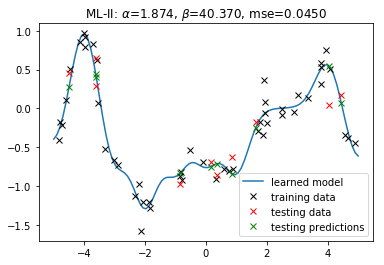

In [5]:
# Template for exercise 4.1
import numpy as np
import matplotlib.pyplot as plt

# Load the observations
data = np.loadtxt('ex4_1_data.txt')
x_obs = data[:,0]
y_obs = data[:,1]

N_train = 50
x_train = x_obs[:N_train]
y_train = y_obs[:N_train]

N_test = 10
x_test = x_obs[N_train:N_train+N_test]
y_test = y_obs[N_train:N_train+N_test]

x_range = (-5, 5) # Possible values of x are in this range

# Basis function parameters
num_basis_functions = 11
centers = np.linspace(x_range[0], x_range[1], num_basis_functions)
lambdaval = 0.17
# You can use here assume the correct basis function centers and lambda ...

def rbf(x, centers, lambdaval):
    # Radial Basis Function output for input x
    #
    # Inputs:
    # x : input points (one-dimensional array)
    # centers : basis function centers (one-dimensional array)
    # lambdaval : basis function width (scalar)
    #
    # Output:
    # Radial Basis Functions evaluated at x (two-dimensional array with len(x)
    #                                        rows and len(centers) columns)
    d = x[:,np.newaxis] - centers[np.newaxis,:]
    y = np.exp(-0.5 * (d ** 2) / lambdaval)
    return y

def bayesian_linear_regression(phi_x, y, alpha, beta):
# Bayesian linear parameter model
#
# Inputs:
# phi_x : the basis function applied to x-data (two-dimensional array)
# y : y-data (one-dimensional array)
# alpha : the precision of the weight prior distribution (scalar)
# beta : the precision of the assumed gaussian noise (scalar)
#
# Output:
# the posterior mean, the posterior covariance, the log marginal likelihood

    N, B = phi_x.shape

    # Add here code to compute:
    # m = the posterior mean of w
    # S = the posterior covariance of w
    # S_inv = the inverse of S
    # Equation 
    S_inv = (alpha * np.identity(B) + beta * np.dot(phi_x.T,phi_x))
    S = np.linalg.inv(S_inv)
    # Note: This is a corrected version of equation 18.1.19 from Barbers book
    d = beta * np.dot(phi_x.T, y)
    m = beta * S @ phi_x.T @ y
    log_likelihood = 0.5 * (-beta * np.dot(y, y) + d @ S @ d + np.log(np.linalg.det(2 * np.pi * S)) + B * np.log(alpha) + N * np.log(beta) - N * np.log(2 * np.pi))
    return m, S, log_likelihood

# Problem 1
# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

ll_best = 0
# Grid search over possible values of alpha and beta
for alpha in alphas:
    for beta in betas:
        # Use here functions rbf and bayesian_linear_regression to compute the
        # log marginal likelihood for given alpha and beta
        phi_x = rbf(x_train, centers, lambdaval)
        _, __, log_likelihood = bayesian_linear_regression(phi_x, y_train, alpha, beta)

        # What are the optimal values of alpha and beta, that maximize the marginal
        # likelihood?
        if log_likelihood > ll_best:
            ll_best = log_likelihood
            best_alpha = alpha  
            best_beta = beta
        # Fit the model one more time using the optimal alpha and beta and the training
        # data to get m for the optimal model
print('Best alpha :', best_alpha)
print('Best beta :', best_beta)    
best_m, _ , __ = bayesian_linear_regression(phi_x, y_train, best_alpha, best_beta)

# Compute the final regression function
x_coord = np.linspace(x_range[0], x_range[1], 100)
# Compute the predicted values for inputs in x_coord using best_m
y_mean = rbf(x_coord, centers, lambdaval) @ best_m.T 

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
y_pred = rbf(x_test, centers, lambdaval) @ best_m.T ##WHY???????

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
mse_test = 1 / N_test * np.sum(y_test @ y_test - 2*y_test@y_pred + y_pred@y_pred)
#mse_test = np.square(y_test - y_pred).mean()

plt.legend()
plt.title("ML-II: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" % (best_alpha, best_beta, mse_test))
plt.show()

Best alpha : 0.0869749002618
Best beta : 0.705480231072


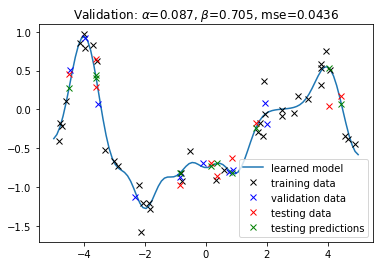

In [11]:
# Problem 2
# Template for exercise 4.2

import numpy as np
import matplotlib.pyplot as plt

# Load the observations
data = np.loadtxt('ex4_1_data.txt')
x_obs = data[:,0]
y_obs = data[:,1]

# Training data
N_train = 40
x_train = x_obs[:N_train]
y_train = y_obs[:N_train]

# Validation data
N_valid = 10
x_valid = x_obs[N_train:N_train+N_valid]
y_valid = y_obs[N_train:N_train+N_valid]

# Testing data
N_test = 10
x_test = x_obs[N_train+N_valid:]
y_test = y_obs[N_train+N_valid:]

x_range = (-5, 5) # Possible values of x are in this range

# Basis function parameters
num_basis_functions = 11
centers = np.linspace(x_range[0], x_range[1], num_basis_functions)
lambdaval = 0.17
# You can use here assume the correct basis function centers and lambda ...

def rbf(x, centers, lambdaval):
    # Radial Basis Function output for input x
    #
    # Inputs:
    # x : input points (one-dimensional array)
    # centers : basis function centers (one-dimensional array)
    # lambdaval : basis function width (scalar)
    #
    # Output:
    # Radial Basis Functions evaluated at x (two-dimensional array with len(x)
    #                                        rows and len(centers) columns)
    d = x[:,np.newaxis] - centers[np.newaxis,:]
    y = np.exp(-0.5 * (d ** 2) / lambdaval)
    return y


def bayesian_linear_regression(phi_x, y, alpha, beta):
# Bayesian linear parameter model
#
# Inputs:
# phi_x : the basis function applied to x-data (two-dimensional array)
# y : y-data (one-dimensional array)
# alpha : the precision of the weight prior distribution (scalar)
# beta : the precision of the assumed gaussian noise (scalar)
#
# Output:
# the posterior mean, the posterior covariance, the log marginal likelihood

    N, B = phi_x.shape

    # Add here code to compute:
    # m = the posterior mean of w
    # S = the posterior covariance of w
    # S_inv = the inverse of S
    # Equation 
    S_inv = (alpha * np.identity(B) + beta * np.dot(phi_x.T,phi_x))
    S = np.linalg.inv(S_inv)
    # Note: This is a corrected version of equation 18.1.19 from Barbers book
    d = beta * np.dot(phi_x.T, y)
    m = beta * S @ phi_x.T @ y
    log_likelihood = 0.5 * (-beta * np.dot(y, y) + d @ S @ d + np.log(np.linalg.det(2 * np.pi * S)) + B * np.log(alpha) + N * np.log(beta) - N * np.log(2 * np.pi))
    return m, S, log_likelihood

# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

min_mse_valid = float("inf")
# Grid search over possible values of alpha and beta
for alpha in alphas:
    for beta in betas:
        # Use here functions rbf and bayesian_linear_regression to fit the
        # model and compute the prediction error (using mean squared error)
        # for the validation data
        phi_x = rbf(x_train, centers, lambdaval)
        m, _, __ = bayesian_linear_regression(phi_x, y_train, alpha, beta)
        
        y_pred_valid =  rbf(x_valid, centers, lambdaval) @ m.T
        mse_valid = 1 / N_valid* np.sum(y_valid @ y_valid - 2*y_valid@y_pred_valid + y_pred_valid @ y_pred_valid)
        if min_mse_valid > mse_valid:
            min_mse_valid = mse_valid
            best_alpha = alpha  
            best_beta = beta
        
# What are the optimal values of alpha and beta, that minimize the prediction
# error in the validation data?
print('Best alpha :', best_alpha)
print('Best beta :', best_beta)

# Fit the model one more time using the optimal alpha and beta and all data
# available for model fitting (both training and validation sets)
N_train_both = 50
x_train_both = x_obs[:N_train_both]
y_train_both = y_obs[:N_train_both]

phi_x_both = rbf(x_train_both, centers, lambdaval)
best_m, _ , __ = bayesian_linear_regression(phi_x_both, y_train_both, best_alpha, best_beta)

x_coord = np.linspace(x_range[0], x_range[1], 100)
# Compute the predicted values for inputs in x_coord using best_m
y_mean = rbf(x_coord, centers, lambdaval) @ best_m.T 

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_valid, y_valid, 'bx', label="validation data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
y_pred = rbf(x_test, centers, lambdaval) @ best_m.T

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
mse_test = 1 / N_test* np.sum(y_test @ y_test - 2*y_test@y_pred + y_pred@y_pred)
#mse_test =  np.square(y_test - y_pred).mean()

plt.legend()
plt.title("Validation: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()

Best alpha : 0.0869749002618
Best beta : 0.705480231072


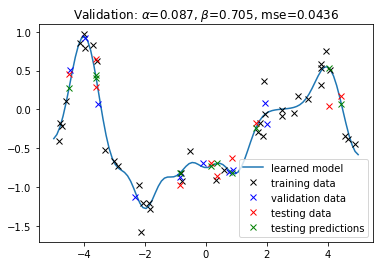

In [12]:
##########################
# Template for exercise 4.2

import numpy as np
import matplotlib.pyplot as plt

# Load the observations
data = np.loadtxt('ex4_1_data.txt')
x_obs = data[:,0]
y_obs = data[:,1]

# Training data
N_train = 40
x_train = x_obs[:N_train]
y_train = y_obs[:N_train]

# Validation data
N_valid = 10
x_valid = x_obs[N_train:N_train+N_valid]
y_valid = y_obs[N_train:N_train+N_valid]

# Testing data
N_test = 10
x_test = x_obs[N_train+N_valid:]
y_test = y_obs[N_train+N_valid:]

x_range = (-5, 5) # Possible values of x are in this range

# Basis function parameters
num_basis_functions = 11
centers = np.linspace(x_range[0], x_range[1], num_basis_functions)
lambdaval = 0.17
# You can use here assume the correct basis function centers and lambda ...

def rbf(x, centers, lambdaval):
    # Radial Basis Function output for input x
    #
    # Inputs:
    # x : input points (one-dimensional array)
    # centers : basis function centers (one-dimensional array)
    # lambdaval : basis function width (scalar)
    #
    # Output:
    # Radial Basis Functions evaluated at x (two-dimensional array with len(x)
    #                                        rows and len(centers) columns)
    d = x[:,np.newaxis] - centers[np.newaxis,:]
    y = np.exp(-0.5 * (d ** 2) / lambdaval)
    return y


def bayesian_linear_regression(phi_x, y, alpha, beta):
# Bayesian linear parameter model
#
# Inputs:
# phi_x : the basis function applied to x-data (two-dimensional array)
# y : y-data (one-dimensional array)
# alpha : the precision of the weight prior distribution (scalar)
# beta : the precision of the assumed gaussian noise (scalar)
#
# Output:
# the posterior mean, the posterior covariance, the log marginal likelihood

    N, B = phi_x.shape

    # Add here code to compute:
    # m = the posterior mean of w
    # S = the posterior covariance of w
    # S_inv = the inverse of S
    # Equation 
    S_inv = (alpha * np.identity(B) + beta * np.dot(phi_x.T,phi_x))
    S = np.linalg.inv(S_inv)
    # Note: This is a corrected version of equation 18.1.19 from Barbers book
    d = beta * np.dot(phi_x.T, y)
    m = beta * S @ phi_x.T @ y
    log_likelihood = 0.5 * (-beta * np.dot(y, y) + d @ S @ d + np.log(np.linalg.det(2 * np.pi * S)) + B * np.log(alpha) + N * np.log(beta) - N * np.log(2 * np.pi))
    return m, S, log_likelihood


# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

min_mse_valid = float("inf")
# Grid search over possible values of alpha and beta
for alpha in alphas:
    for beta in betas:
        # Use here functions rbf and bayesian_linear_regression to fit the
        # model and compute the prediction error (using mean squared error)
        # for the validation data
        phi_x = rbf(x_train, centers, lambdaval)
        m, _, __ = bayesian_linear_regression(phi_x, y_train, alpha, beta)
        
        y_pred_valid =  rbf(x_valid, centers, lambdaval) @ m.T
        mse_valid = 1 / N_valid* np.sum(y_valid @ y_valid - 2*y_valid@y_pred_valid + y_pred_valid @ y_pred_valid)
        if min_mse_valid > mse_valid:
            min_mse_valid = mse_valid
            best_alpha = alpha  
            best_beta = beta
        
# What are the optimal values of alpha and beta, that minimize the prediction
# error in the validation data?
print('Best alpha :', best_alpha)
print('Best beta :', best_beta)

# Fit the model one more time using the optimal alpha and beta and all data
# available for model fitting (both training and validation sets)
N_train_both = 50
x_train_both = x_obs[:N_train_both]
y_train_both = y_obs[:N_train_both]

phi_x_both = rbf(x_train_both, centers, lambdaval)
best_m, _ , __ = bayesian_linear_regression(phi_x_both, y_train_both, best_alpha, best_beta)

x_coord = np.linspace(x_range[0], x_range[1], 100)
# Compute the predicted values for inputs in x_coord using best_m
y_mean = rbf(x_coord, centers, lambdaval) @ best_m.T 

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_valid, y_valid, 'bx', label="validation data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
y_pred = rbf(x_test, centers, lambdaval) @ best_m.T

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
mse_test = 1 / N_test* np.sum(y_test @ y_test - 2*y_test@y_pred + y_pred@y_pred)

plt.legend()
plt.title("Validation: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()


#### Problem 4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


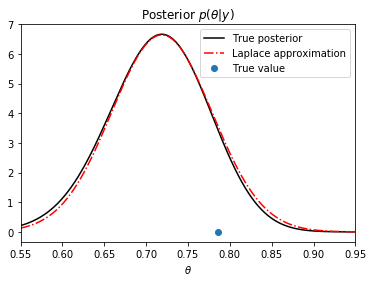

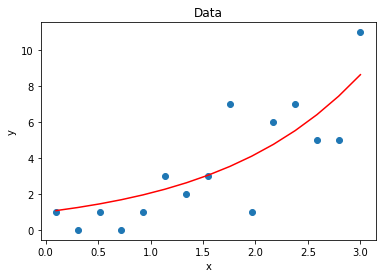

In [19]:
# ML: Advanced Probabilistic Methods
# Template for exercise 4.4
import numpy as np
import matplotlib.pyplot as plt

# get some data
data = np.loadtxt('ex4_4_data.txt')
x = data[:,0]
y = data[:,1]

theta_true = np.pi / 4 # true parameter used to generate the data
alpha = 1e-2 # prior's parameter

# compute Laplace approximation
theta_lapl = 0.5 # initial

# iterate to optimum with newton's method to find the MAP estimate for theta
for iter in range(100):
    grad = - y @ x + np.sum(np.exp(theta_lapl * x)*x) + alpha * theta_lapl
    H = np.sum(x * np.exp(theta_lapl * x) * x) + alpha
    theta_lapl = theta_lapl - grad / H # do newton step

# compute Hessian at optimum
H = np.sum(x * np.exp(theta_lapl * x) * x) + alpha
difference = theta_lapl - theta_true

# plot posterior densities
theta = np.linspace(0.55, 0.95, 1000)
post_true = np.zeros(len(theta))

for i in range(len(theta)):
    # log posterior:
    from scipy.misc import factorial
    post_true[i] = (np.dot(y, x * theta[i]) - np.sum(np.exp(x * theta[i]) -
                    np.log(factorial(y))) - 0.5*alpha*np.dot(theta[i], theta[i]))
M = np.amax(post_true)
post_true = np.exp(post_true-M) / np.sum(np.exp(post_true-M)) / (theta[1]-theta[0]) # normalize

import scipy.stats 
post_laplace = np.zeros(len(theta))
for i in range(len(theta)):
    post_laplace[i] = scipy.stats.norm(theta_lapl, 1/np.sqrt(H)).pdf(theta[i])
                    # compute approximative density at the points 'theta'
                    # Hint: you can use norm.pdf from scipy.stats

plt.figure(1)
plt.plot(theta, post_true, '-k', label="True posterior")
plt.plot(theta, post_laplace, '-.r', label="Laplace approximation")
plt.plot(theta_true, 0, 'o', label="True value")
plt.xlim(0.55, 0.95)
plt.xlabel('$\\theta$')
plt.title('Posterior $p(\\theta|y)$')
plt.legend()

plt.figure(2)
plt.plot(x, y, 'o', x, np.exp(theta_lapl*x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()